In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [7]:

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

In [9]:
data_path = "./nsmc/ratings.txt"
column_names = ["id","document","label"]
data = pd.read_csv(data_path, names = column_names, sep='\t', keep_default_na=False)[1:]
data_length = []
data_length_positive = []
data_length_negative = []

In [13]:
for i in range(len(data)):
    data_length.append(len(data.iloc[i].document))
    if int(data.iloc[i].label) == 1:
        data_length_positive.append(len(data.iloc[i].document))
    else:
        data_length_negative.append(len(data.iloc[i].document))

In [15]:
print(len(data_length))
print(len(data_length_positive))
print(len(data_length_negative))
print(data_length[0])

400000
100000
300000
19


In [17]:
data_length = np.array(data_length)
data_length_negative = np.array(data_length_negative)
data_length_positive = np.array(data_length_positive)

/home/ugonfor/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


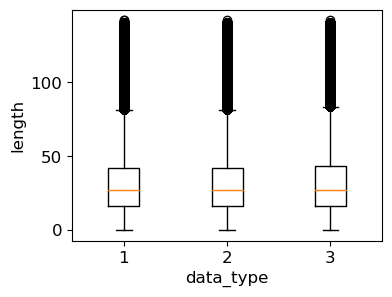

In [22]:
fig, ax = plt.subplots()

box = ax.boxplot([data_length, data_length_positive, data_length_negative])
ax.set_xlabel('data_type')
ax.set_ylabel('length')
plt.show()

In [31]:
df = pd.DataFrame(data_length)

In [32]:
df.describe()

,0
count,400000.000000
mean,35.214435
std,29.539934
min,0.000000
25%,16.000000
50%,27.000000
75%,42.000000
max,142.000000


사실상 데이터의 75%가 문장이 42글자 이내로 끝나기 때문에... MAX_LEN을 현저히 줄여도 된다.

In [46]:

from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
tk_data_length = []
tk_data_length_positive = []
tk_data_length_negative = []

for i in range(len(data)):
    length = len(tokenizer(data.iloc[i].document)['input_ids'])
    tk_data_length.append(length)
    if int(data.iloc[i].label) == 1:
        tk_data_length_positive.append(length)
    else:
        tk_data_length_negative.append(length)


AttributeError: 'numpy.ndarray' object has no attribute 'append'